# **DETECT QR PHISHING USING NOVEL ASSEMBLY ALGORITHMS**


In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
# Set image dimensions
height, width = 224, 224  # Standard size, adjust if needed
channels = 3  # RGB images

In [3]:
benign_path = '/content/qr_data/benign_qr_code_images'
malicious_path = '/content/qr_data/malicious_qr_code_images'

In [4]:
def load_images(folder_path, label):
    images = []
    labels = []
    for img_name in os.listdir(folder_path):
        if img_name.endswith('.png'):
            img_path = os.path.join(folder_path, img_name)
            img = load_img(img_path, target_size=(height, width))
            img_array = img_to_array(img)
            img_array = img_array / 255.0
            images.append(img_array)
            labels.append(label)
    return images, labels

In [5]:
# Load images
benign_images, benign_labels = load_images(benign_path, 0)
malicious_images, malicious_labels = load_images(malicious_path, 1)

In [6]:
# Combine datasets
X = np.array(benign_images + malicious_images)
y = np.array(benign_labels + malicious_labels)

In [7]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Convert to categorical
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [9]:
print("shape of x_train:", x_train.shape)
print("shape of y_train:", y_train.shape)
print("shape of x_test:", x_test.shape)
print("shape of y_test:", y_test.shape)

shape of x_train: (800, 224, 224, 3)
shape of y_train: (800, 2)
shape of x_test: (200, 224, 224, 3)
shape of y_test: (200, 2)


In [10]:
# Define model parameters
num_classes = 2  # Benign and Malicious
batch_size = 32
num_epochs = 10

In [ ]:
# Create and train model
input_shape = (height, width, channels)

model_1 = keras.Sequential([
    Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(num_classes, activation='softmax')
])

In [12]:
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │       373,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 392,642 (1.50 MB)

 Trainable params: 392,642 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
start_time = time.time()
model_1.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_test, y_test))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time:.2f} seconds")

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.6580 - loss: 2.0239 - val_accuracy: 0.7850 - val_loss: 0.4893
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7765 - loss: 0.4554 - val_accuracy: 0.8600 - val_loss: 0.3757
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8627 - loss: 0.3284 - val_accuracy: 0.8850 - val_loss: 0.3211
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9298 - loss: 0.2281 - val_accuracy: 0.8800 - val_loss: 0.2875
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9502 - loss: 0.1499 - val_accuracy: 0.8850 - val_loss: 0.2963
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.9564 - loss: 0.1036 - val_accuracy: 0.9000 - val_loss: 0.3148
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.9715 - loss: 0.0801 - val_accuracy: 0.8950 - val_loss: 0.3164
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.9847 - loss: 0.0461 - val_accuracy: 0.9000 - val_loss:

In [15]:
# Evaluate model
score = model_1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.40054261684417725
Test accuracy: 0.8949999809265137


In [16]:
# 1. Get predicted class labels
y_prob = model_1.predict(x_test)              # shape (N, num_classes)
y_pred = np.argmax(y_prob, axis=1)            # shape (N,)
y_true = np.argmax(y_test, axis=1)            # shape (N,)

# 2. Compute confusion matrix entries
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

# 3. Compute metrics
accuracy_1    = (tp + tn) / (tp + fp + tn + fn)
precision_1  = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_1 = tp / (tp + fn) if (tp + fn) > 0 else 0   # a.k.a recall
f1_score_1    = 2 * (precision_1 * sensitivity_1) / (precision_1 + sensitivity_1) \
              if (precision_1 + sensitivity_1) > 0 else 0

# 4. Display
print(f"TP={tp}, FP={fp}, TN={tn}, FN={fn}")
print(f"Accuracy_1  = (TP + TN) / (TP + FP + TN + FN) = {accuracy_1:.4f}")
print(f"Precision_1 = TP / (TP + FP)                   = {precision_1:.4f}")
print(f"Sensitivity_1 (Recall) = TP / (TP + FN)        = {sensitivity_1:.4f}")
print(f"F1 Score_1  = 2*(Precision*Sensitivity)/(Precision+Sensitivity) = {f1_score_1:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 541ms/step
TP=89, FP=6, TN=90, FN=15
Accuracy_1  = (TP + TN) / (TP + FP + TN + FN) = 0.8950
Precision_1 = TP / (TP + FP)                   = 0.9368
Sensitivity_1 (Recall) = TP / (TP + FN)        = 0.8558
F1 Score_1  = 2*(Precision*Sensitivity)/(Precision+Sensitivity) = 0.8945


In [17]:
input_shape = (height, width, channels)
model_2 = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [18]:
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,815,234 (182.40 MB)

 Trainable params: 47,815,234 (182.40 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
start_time = time.time()
model_2.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_test, y_test))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time:.2f} seconds")

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - accuracy: 0.6593 - loss: 5.2829 - val_accuracy: 0.7850 - val_loss: 0.4262
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 136s 5s/step - accuracy: 0.8370 - loss: 0.3962 - val_accuracy: 0.8850 - val_loss: 0.3308
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 138s 6s/step - accuracy: 0.9048 - loss: 0.2681 - val_accuracy: 0.8800 - val_loss: 0.3357
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 132s 5s/step - accuracy: 0.9499 - loss: 0.1522 - val_accuracy: 0.9000 - val_loss: 0.2726
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 145s 5s/step - accuracy: 0.9822 - loss: 0.0652 - val_accuracy: 0.8800 - val_loss: 0.4957
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 137s 5s/step - accuracy: 0.9869 - loss: 0.0350 - val_accuracy: 0.8850 - val_loss: 0.4352
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 151s 5s/step - accuracy: 0.9977 - loss: 0.0222 - val_accuracy: 0.8800 - val_loss: 0.4576
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 136s 5s/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 0.8650 - v

In [21]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.6003044247627258
Test accuracy: 0.8700000047683716


In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix

# 1. Get predicted class labels
y_prob = model_2.predict(x_test)              # shape (N, num_classes)
y_pred = np.argmax(y_prob, axis=1)            # shape (N,)
y_true = np.argmax(y_test, axis=1)            # shape (N,)

# 2. Compute confusion matrix entries
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

# 3. Compute metrics
accuracy_2    = (tp + tn) / (tp + fp + tn + fn)
precision_2   = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_2 = tp / (tp + fn) if (tp + fn) > 0 else 0   # a.k.a recall
f1_score_2    = 2 * (precision_2 * sensitivity_2) / (precision_2 + sensitivity_2) \
              if (precision_2 + sensitivity_2) > 0 else 0

# 4. Display
print(f"TP={tp}, FP={fp}, TN={tn}, FN={fn}")
print(f"Accuracy_2  = (TP + TN) / (TP + FP + TN + FN) = {accuracy_2:.4f}")
print(f"Precision_2 = TP / (TP + FP)                   = {precision_2:.4f}")
print(f"Sensitivity_2 (Recall) = TP / (TP + FN)        = {sensitivity_2:.4f}")
print(f"F1 Score_2  = 2*(Precision*Sensitivity)/(Precision+Sensitivity) = {f1_score_2:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 966ms/step
TP=89, FP=11, TN=85, FN=15
Accuracy_2  = (TP + TN) / (TP + FP + TN + FN) = 0.8700
Precision_2 = TP / (TP + FP)                   = 0.8900
Sensitivity_2 (Recall) = TP / (TP + FN)        = 0.8558
F1 Score_2  = 2*(Precision*Sensitivity)/(Precision+Sensitivity) = 0.8725


In [23]:
input_shape = (height, width, channels)
model_3 = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,132,450 (50.10 MB)

 Trainable params: 13,132,450 (50.10 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
start_time = time.time()
model_3.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_test, y_test))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time:.2f} seconds")

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 330s 13s/step - accuracy: 0.5081 - loss: 1.4733 - val_accuracy: 0.4800 - val_loss: 0.7091
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 279s 11s/step - accuracy: 0.6457 - loss: 0.6352 - val_accuracy: 0.7850 - val_loss: 0.4925
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 324s 11s/step - accuracy: 0.7862 - loss: 0.5001 - val_accuracy: 0.7850 - val_loss: 0.4655
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 314s 11s/step - accuracy: 0.7908 - loss: 0.4783 - val_accuracy: 0.8050 - val_loss: 0.5484
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 324s 11s/step - accuracy: 0.7987 - loss: 0.4776 - val_accuracy: 0.8600 - val_loss: 0.3784
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 330s 11s/step - accuracy: 0.8590 - loss: 0.3860 - val_accuracy: 0.8200 - val_loss: 0.4602
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 318s 11s/step - accuracy: 0.8480 - loss: 0.3834 - val_accuracy: 0.8500 - val_loss: 0.3410
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 317s 11s/step - accuracy: 0.8543 - loss: 0.3669 - val_accuracy: 0.

In [27]:
score = model_3.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.31234756112098694
Test accuracy: 0.8650000095367432


In [28]:
# 1. Get predicted class labels
y_prob = model_3.predict(x_test)              # shape (N, num_classes)
y_pred = np.argmax(y_prob, axis=1)            # shape (N,)
y_true = np.argmax(y_test, axis=1)            # shape (N,)

# 2. Compute confusion matrix entries
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

# 3. Compute metrics
accuracy_3    = (tp + tn) / (tp + fp + tn + fn)
precision_3   = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_3 = tp / (tp + fn) if (tp + fn) > 0 else 0   # a.k.a recall
f1_score_3    = 2 * (precision_3 * sensitivity_3) / (precision_3 + sensitivity_3) \
              if (precision_3 + sensitivity_3) > 0 else 0

# 4. Display
print(f"TP={tp}, FP={fp}, TN={tn}, FN={fn}")
print(f"Accuracy_3  = (TP + TN) / (TP + FP + TN + FN) = {accuracy_3:.4f}")
print(f"Precision_3 = TP / (TP + FP)                   = {precision_3:.4f}")
print(f"Sensitivity_3 (Recall) = TP / (TP + FN)        = {sensitivity_3:.4f}")
print(f"F1 Score_3  = 2*(Precision*Sensitivity)/(Precision+Sensitivity) = {f1_score_3:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step
TP=86, FP=9, TN=87, FN=18
Accuracy_3  = (TP + TN) / (TP + FP + TN + FN) = 0.8650
Precision_3 = TP / (TP + FP)                   = 0.9053
Sensitivity_3 (Recall) = TP / (TP + FN)        = 0.8269
F1 Score_3  = 2*(Precision*Sensitivity)/(Precision+Sensitivity) = 0.8643


Model Performance Comparison Table:

                 Accuracy  Precision  Sensitivity  F1 Score
Proposed Model      0.895   0.936842     0.855769  0.894472
Erdas (2024)        0.870   0.890000     0.855769  0.872549
Lourenco (2023)     0.865   0.905263     0.826923  0.864322


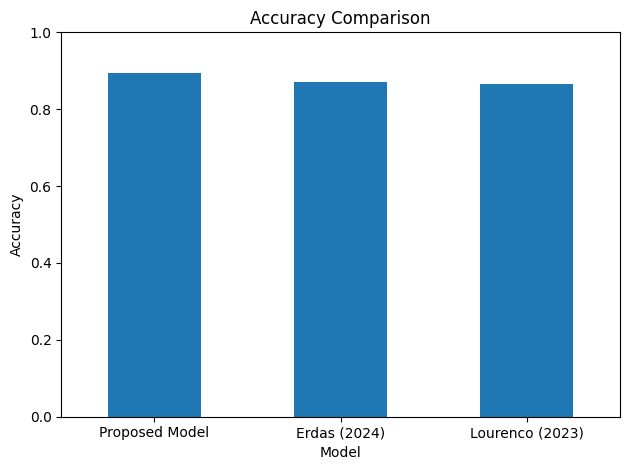

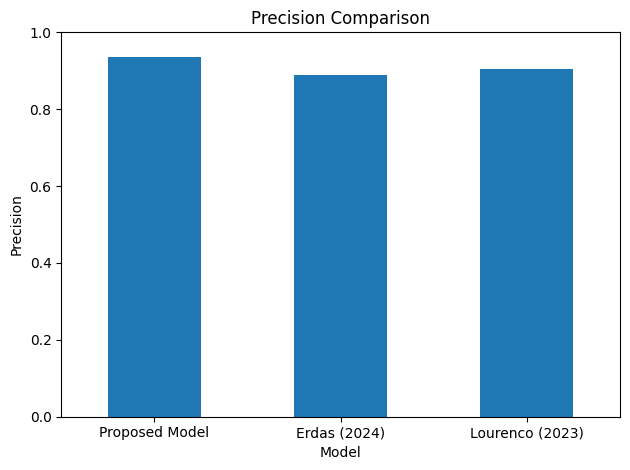

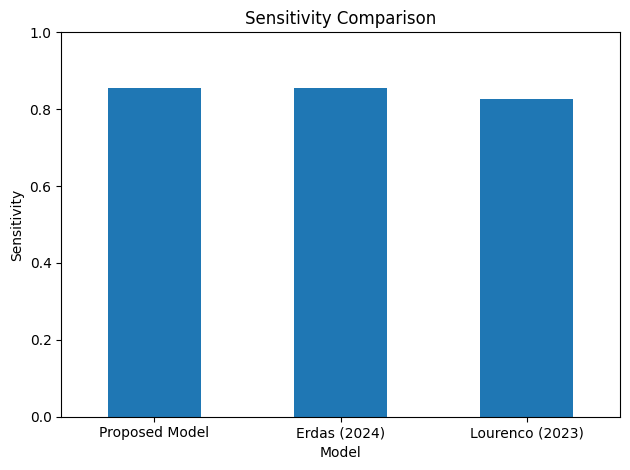

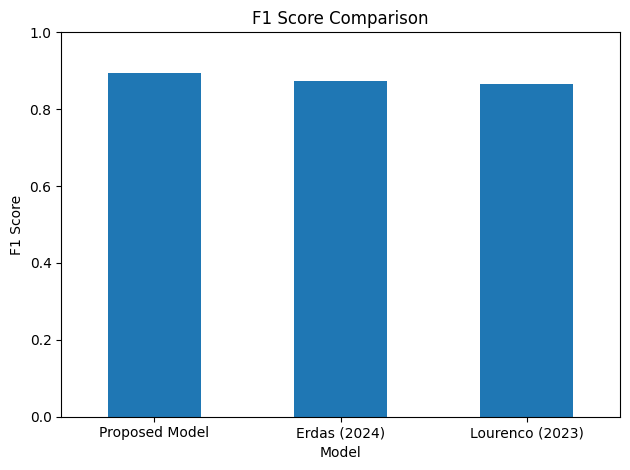

In [33]:
metrics = {
    'Proposed Model': {
        'Accuracy':    accuracy_1,
        'Precision':   precision_1,
        'Sensitivity': sensitivity_1,
        'F1 Score':    f1_score_1
    },
    'Erdas (2024)': {
        'Accuracy':    accuracy_2,
        'Precision':   precision_2,
        'Sensitivity': sensitivity_2,
        'F1 Score':    f1_score_2
    },
    'Lourenco (2023)': {
        'Accuracy':    accuracy_3,
        'Precision':   precision_3,
        'Sensitivity': sensitivity_3,
        'F1 Score':    f1_score_3
    }
}

# 2. Turn it into a DataFrame
df = pd.DataFrame.from_dict(metrics, orient='index')
print("Model Performance Comparison Table:\n")
print(df)   # your comparison table

# 3. Plot a separate bar chart for each metric
for metric in df.columns:
    plt.figure()
    df[metric].plot(kind='bar')
    plt.title(f'{metric} Comparison')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.ylim(0, 1)      # metrics are in [0,1]
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


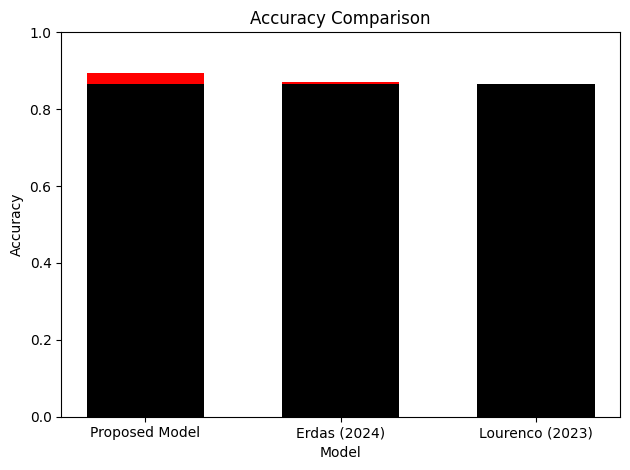

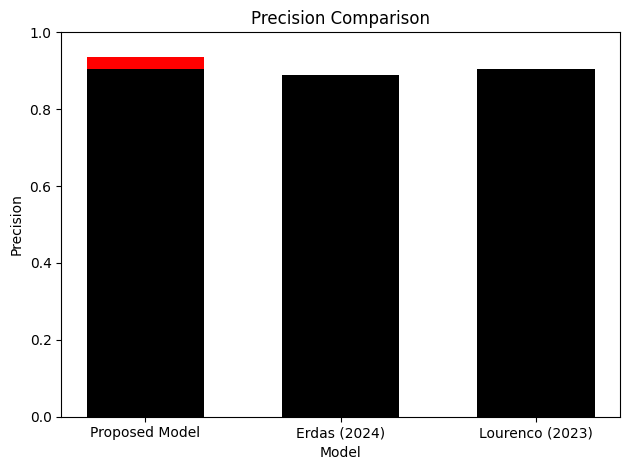

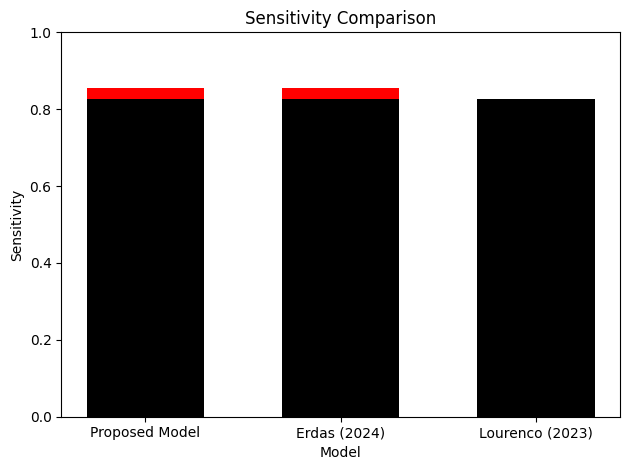

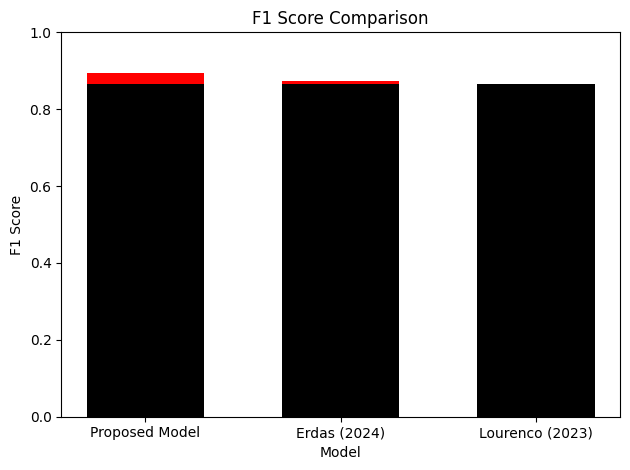

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Plot each metric
for metric in df.columns:
    plt.figure()

    # X positions and metric values
    x = np.arange(len(df.index))
    y = df[metric].values

    # Bar properties
    bar_width = 0.6
    bar_color = 'black'
    highlight_color = 'red'  # color for the difference segment

    # Draw base bars in black
    bars = plt.bar(x, y, color=bar_color, width=bar_width)

    # Highlight the difference between the highest and lowest bars
    # (or you can pick any specific bar to compare to the last one)
    ref_idx = -1  # index of reference (e.g., last bar)
    for i in range(len(y)):
        if i == ref_idx:
            continue
        diff = y[i] - y[ref_idx]
        if diff > 0:
            # Draw a red rectangle at the top
            plt.bar(x[i], diff, bottom=y[ref_idx], color=highlight_color, width=bar_width)

    # Labeling
    plt.title(f'{metric} Comparison')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.xticks(ticks=x, labels=df.index, rotation=0)
    plt.tight_layout()
    plt.show()
